In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

In [24]:
df = pd.read_csv("./data/상가(상권)정보_의료기관_201909.csv", low_memory=False)
df.shape

(91335, 39)

In [25]:
df.head() # 데이터 미리보기

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.130000e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1.170000e+24,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4.140000e+24,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2.650000e+24,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4.150000e+24,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528


In [26]:
df.tail() # tail로 마지막에 있는 데이터만 불러오기

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3.020000e+24,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4.130000e+24,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2.640000e+24,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2.0,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1.170000e+24,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4.410000e+24,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [27]:
df.info() # 데이터의 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

In [28]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [29]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

In [30]:
# df.isnull()
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

In [31]:
# 위에서 계산한 결측치 수를 reset_index에 담아서 데이터 프레임으로 만듦
# df_null_count 변수에 결과를 담아서 head로 미리보기

df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [32]:
# 컬럼명 변경하기

df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


In [33]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해
# 결측치가 많은 순으로 상위 10개만 출력

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75898
35,층정보,47346
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [34]:
# 폰트명 찾기

# import matplotlib.font_manager as fm

# font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

# font_list[:]

<AxesSubplot:>

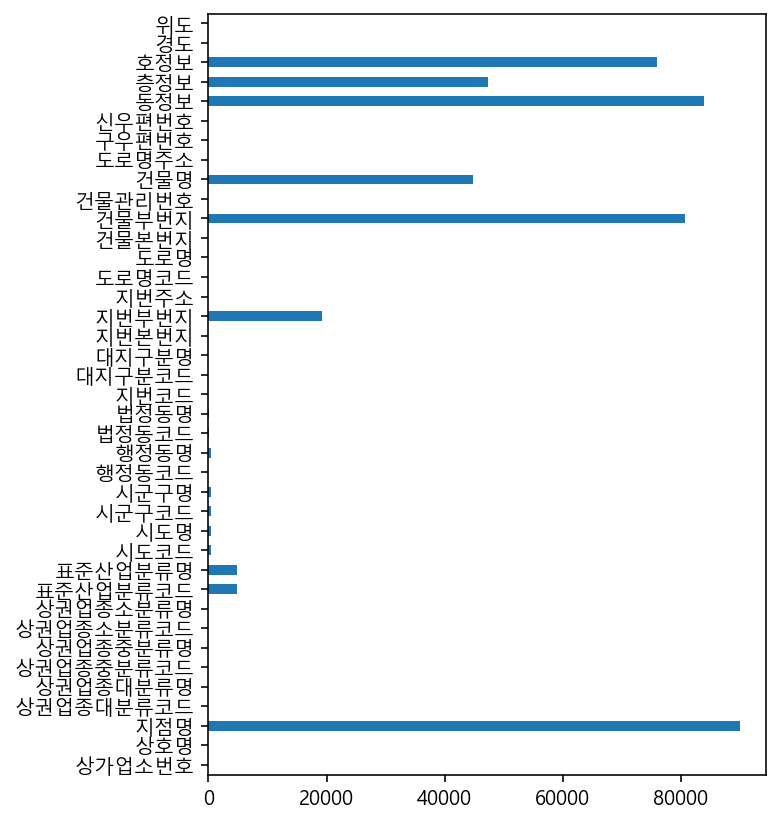

In [35]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대 그래프로 표현
null_count.plot.barh(figsize=(5,7))

In [36]:
# 특정 컬럼만 불러오기 
# NaN == Not a Number 의 약자로 결측치를 의미

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [37]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담기

drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [38]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.

df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


In [13]:
# 제거하기
# axis=0 이면 행을 기준으로, axis=1은 열 기준으로

print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

NameError: name 'df' is not defined

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  float64
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

In [21]:
# 기초 통계값 보기

#평균값
df["위도"].mean()
# df["경도"].mean()

36.62471119236107

In [22]:
#중앙값
df["위도"].median()

37.23465232

In [23]:
# 최댓값
df["위도"].max()

38.49965857

In [24]:
# 최솟값
df["위도"].min()

33.21928967

In [25]:
# 갯수
df["위도"].count()

91335

In [26]:
# 요약값
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [27]:
# 2개 이상의 colum 요약하기
# 리스트 형태의 자료구조를 사용해야함

df[["위도", "경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


In [28]:
# 특정 데이터만 요약하기
# 숫자로 된 데이터만 요약: number

df.describe(include="number")

,상가업소번호,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,도로명코드,건물본번지,건물관리번호,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,9.133500e+04,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32898.381877,3.293232e+09,3.293385e+09,3.293350e+18,1.001336,587.534549,3.293345e+11,251.200482,3.295158e+24,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,12985.393171,1.297387e+09,1.297706e+09,1.297268e+18,0.036524,582.519364,1.297263e+11,477.456487,1.298360e+24,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11110.000000,1.111052e+09,1.111010e+09,1.110000e+18,1.000000,1.000000,1.110000e+11,0.000000,1.110000e+24,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26350.000000,2.635065e+09,2.635011e+09,2.640000e+18,1.000000,162.000000,2.640000e+11,29.000000,2.640000e+24,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41117.000000,4.111758e+09,4.111710e+09,4.110000e+18,1.000000,462.000000,4.110000e+11,92.000000,4.110000e+24,440300.000000,24353.00000,127.084551,37.234652
75%,2.480984e+07,43113.000000,4.311370e+09,4.311311e+09,4.310000e+18,1.000000,858.000000,4.310000e+11,257.000000,4.310000e+24,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50130.000000,5.013061e+09,5.013032e+09,5.010000e+18,2.000000,7338.000000,5.010000e+11,8795.000000,5.010000e+24,799801.000000,63643.00000,130.909912,38.499659


In [29]:
# 문자열로 된 데이터만 요약: number

df.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335
unique,56908,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198


In [30]:
# 모든 데이터 요약: all

df.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335
unique,56908,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198


In [31]:
#중복 제거한 값 보기
# unique로 중복을 제거한 값을 보고 nunique로 개수를 세기
# 상권업종대분류명


df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [32]:
#개수 nunique()
df["상권업종대분류명"].nunique()

1

In [33]:
#상권업종중분류명
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [34]:
#개수 nunique()
#len()

df["상권업종중분류명"].nunique()
len(df["상권업종중분류명"].unique())

5

In [35]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [36]:
df["상권업종소분류명"].nunique()

34

In [37]:
#시도명세기
# value_counts() 빈도수
city = df["시도명"].value_counts()

In [38]:
#normalize=True 옵션을 사용하면 비율을 구할 수 있음

city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

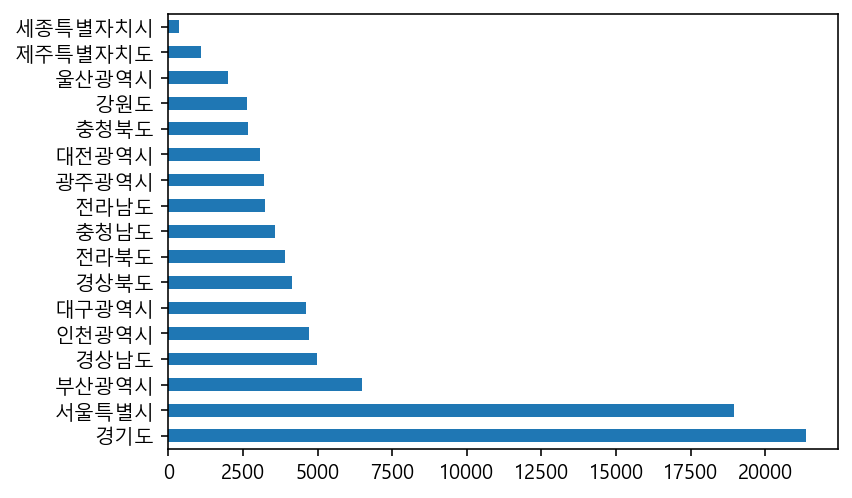

In [39]:
city.plot.barh()

In [40]:
#v파이 그래프
# city_normalize.plot.pie(figsize=(7, 7))

#figsize는 그래프의 크기

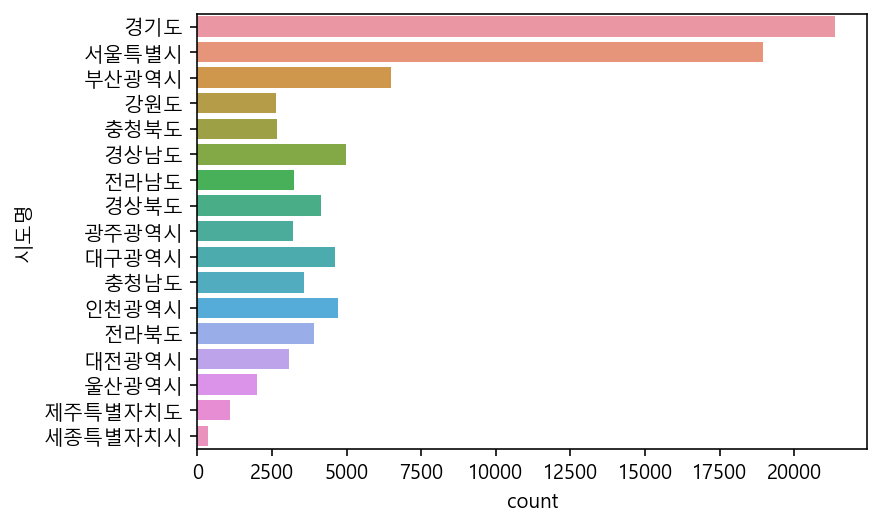

In [41]:
#seaborn의 countplot으로 그려봅시다.
#예쁘지만 데이터가 커지면 느림

c = sns.countplot(data=df, y="시도명")

In [42]:
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [43]:
#"상권업종중분류명"으로 갯수 세기

c = df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [44]:
# normalize=True를 사용해 비율 구하기
n = df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

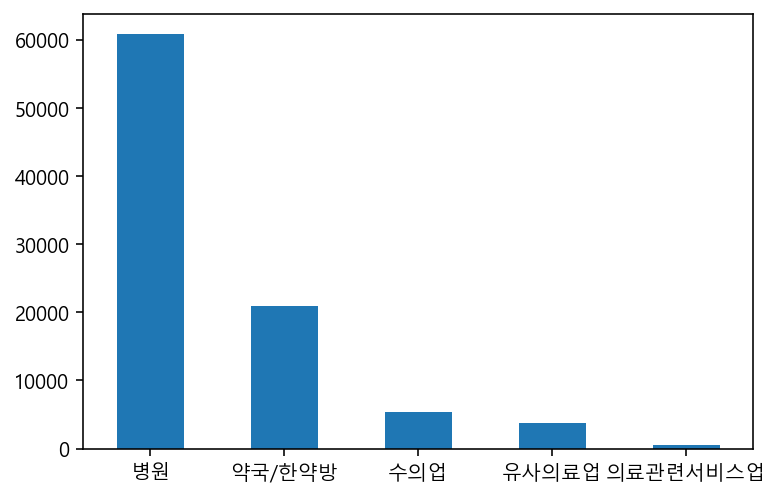

In [45]:

#rot는 로테이션, 회전의 약자로 그래프에 있는 글자를 얼만큼 회전시킬지
c.plot.bar(rot=0)

<AxesSubplot:ylabel='상권업종중분류명'>

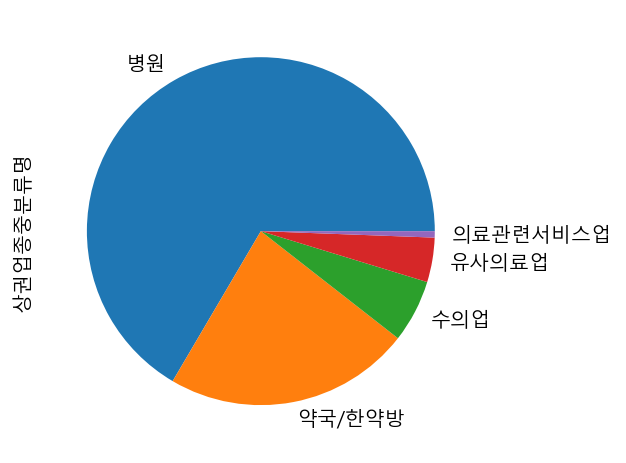

In [46]:
n.plot.pie()

In [47]:
#상권업종소분류명
c = df["상권업종소분류명"].value_counts()
c

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
수의업-기타         9
접골원            9
제대혈            1
Name: 상권업종소분류명, dtype: int64

In [48]:
n = df["상권업종소분류명"].value_counts(normalize=True)
n

약국         0.207631
치과의원       0.150337
한의원        0.144643
내과/외과      0.124531
기타병원       0.053890
일반병원       0.037061
동물병원       0.033919
정형/성형외과    0.028051
소아과        0.027065
수의업-종합     0.024262
치과기공소      0.018876
이비인후과의원    0.016270
한약방        0.015788
피부과        0.013938
산부인과       0.012219
노인/치매병원    0.011551
안과의원       0.011409
비뇨기과       0.008858
종합병원       0.008343
치과병원       0.008277
언어치료       0.007270
유사의료업기타    0.006887
탕제원        0.005660
산후조리원      0.005595
신경외과       0.004609
한방병원       0.004347
척추교정치료     0.003701
침구원        0.001686
혈액원        0.001423
응급구조대      0.001369
조산원        0.000328
수의업-기타     0.000099
접골원        0.000099
제대혈        0.000011
Name: 상권업종소분류명, dtype: float64

<AxesSubplot:>

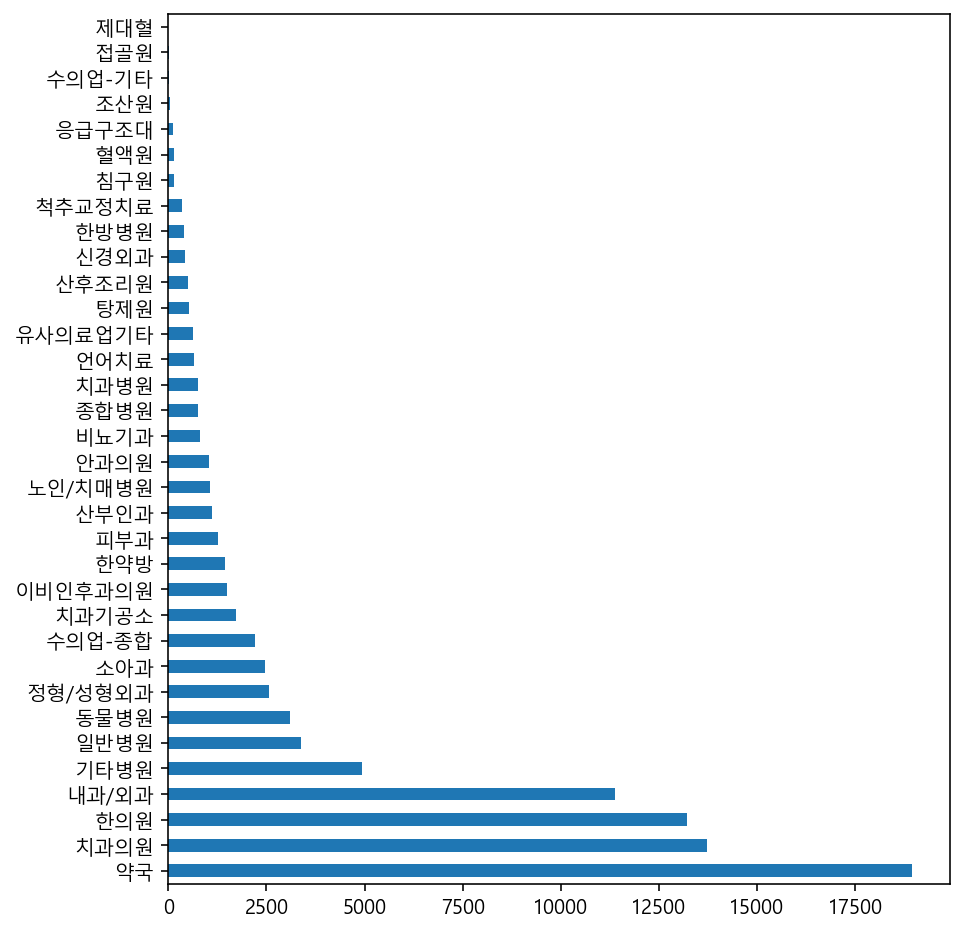

In [49]:
c.plot.barh(figsize=(7,8))

In [50]:
#데이터 색인하기

In [51]:
#"시군구명"이 "노원"인 데이터만 가져와서
# df_nowon 이라는 변수에 담아봅니다.
# 그리고 head()를 써서 미리보기를 합니다.

df_nowon = df[df["시군구명"] == "노원구"].copy()
df_nowon.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
41,20916395,이태형한의원,S,의료,S01,병원,S01B06,한의원,서울특별시,11350.0,...,서울특별시 노원구 중계동 506,1.140000e+11,서울특별시 노원구 동일로203가길,29,1.140000e+24,서울특별시 노원구 동일로203가길 29,139880.0,1779.0,127.064245,37.639918


In [1]:
# 시군구명에서 노원구만 가져옵니다.
# df.loc를 사용하면 행, 열을 가져올 수 있습니다.


df_medical = df_nowon[df_nowon["상권업종중분류명"] == "병원"]
df_medical.head()

NameError: name 'df_nowon' is not defined

In [53]:
df_medical["상권업종소분류명"].value_counts()
# df_medical.head()

한의원        119
치과의원       116
내과/외과       96
기타병원        45
소아과         27
일반병원        20
이비인후과의원     18
정형/성형외과     17
안과의원        12
산부인과        10
피부과          9
비뇨기과         6
종합병원         2
노인/치매병원      2
신경외과         2
치과병원         1
한방병원         1
Name: 상권업종소분류명, dtype: int64

In [57]:
# 성형외과
beauty = df_medical[df_medical["상권업종소분류명"] == "정형/성형외과"]
beauty["상호명"].value_counts()

세일정형외과            1
수정형외과병원           1
JK성형외과피부과         1
윤앤정와이앤제이성형외과의원    1
유피성형외과의원          1
코리아정형외과의원         1
연세거뜬정형외과의원        1
온누리정형외과의원         1
중계본정형외과           1
이승재성형외과의원         1
굳쎈정형외과의원          1
서울성형외과의원          1
연세성형외과의원          1
상계정형외과            1
중계성모정형외과          1
이필상정형외과           1
노원백정형외과의원         1
Name: 상호명, dtype: int64

In [56]:
# 기타병원
etc = df_medical[df_medical["상권업종소분류명"] == "기타병원"]
etc["상호명"].value_counts()

디딤정신건강의학과의원       1
상계가정의원            1
마음편한정신과의원         1
스마트의원             1
지인통증의학과의원         1
연세마디튼튼의원          1
지인마취통증의학과의원노원점    1
상계신경정신과의원         1
신통방통마취통증의학과의원     1
박상호의원             1
예랑마취통증의학과의원       1
서울동아의원            1
실로암의원             1
태능마이크로병원1층        1
파티마재가복지센터         1
신원진단검사의학과의원       1
수암의원              1
노원진단검사과           1
이앤정신경정신과          1
김영헌신경정신과          1
박재순신경정신과의원        1
드림유의원             1
열린성모신경정신과         1
이앤정정신과의원          1
이가정의학과            1
김희섭의원             1
청운의료재단노원우리의원      1
동인의원              1
노원가정의원            1
최의원               1
고려의원              1
한마음가정의원           1
권오민마취통증의학과의원      1
늘푸른통증의학과의원        1
화인마취통증의학과의원노원점    1
방대홍영상의학과의원        1
닥터의원              1
나래통증의학과           1
맑은머리신경과           1
조가정의원             1
솔재활의학과의원          1
한음한방신경정신과한의원      1
김호철방사선과의원         1
문가정의학과의원          1
서울아이마음클리닉         1
Name: 상호명, dtype: int64

In [ ]:
df_medical["상호명"].value_counts().head()

In [ ]:
df_nowon["상권업종중분류명"].value_counts()

In [ ]:
#의료관련서비스업이나 유사의료업

df_medi = df_nowon[df_nowon["상권업종중분류명"] == "의료관련서비스업"]
df_medi["상호명"].value_counts()

<AxesSubplot:xlabel='count', ylabel='상권업종소분류명'>

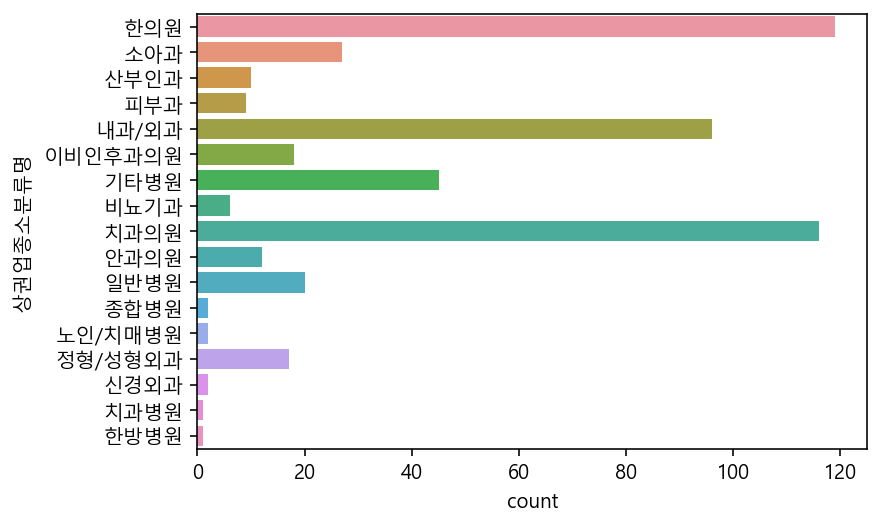

In [55]:
sns.countplot(data=df_medical, y="상권업종소분류명")

In [118]:
#동별 인프라 갯수

df_medical["행정동명"].value_counts()

상계6.7동    110
중계2.3동     43
상계2동       42
공릉1동       40
월계3동       25
상계1동       25
중계본동       24
월계1동       24
중계4동       24
상계8동       21
상계9동       21
공릉2동       17
중계1동       16
상계3.4동     15
하계1동       15
월계2동       14
하계2동       11
상계5동       11
상계10동       5
Name: 행정동명, dtype: int64

<AxesSubplot:>

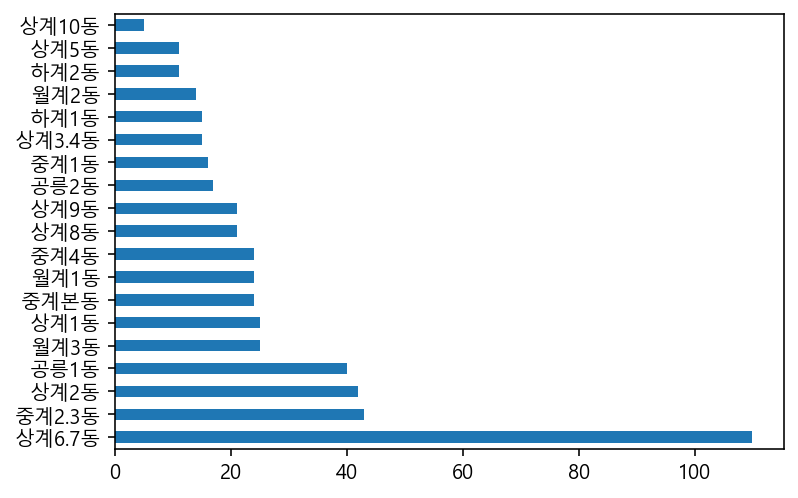

In [119]:
df_medical["행정동명"].value_counts().plot.barh()

<AxesSubplot:xlabel='경도', ylabel='위도'>

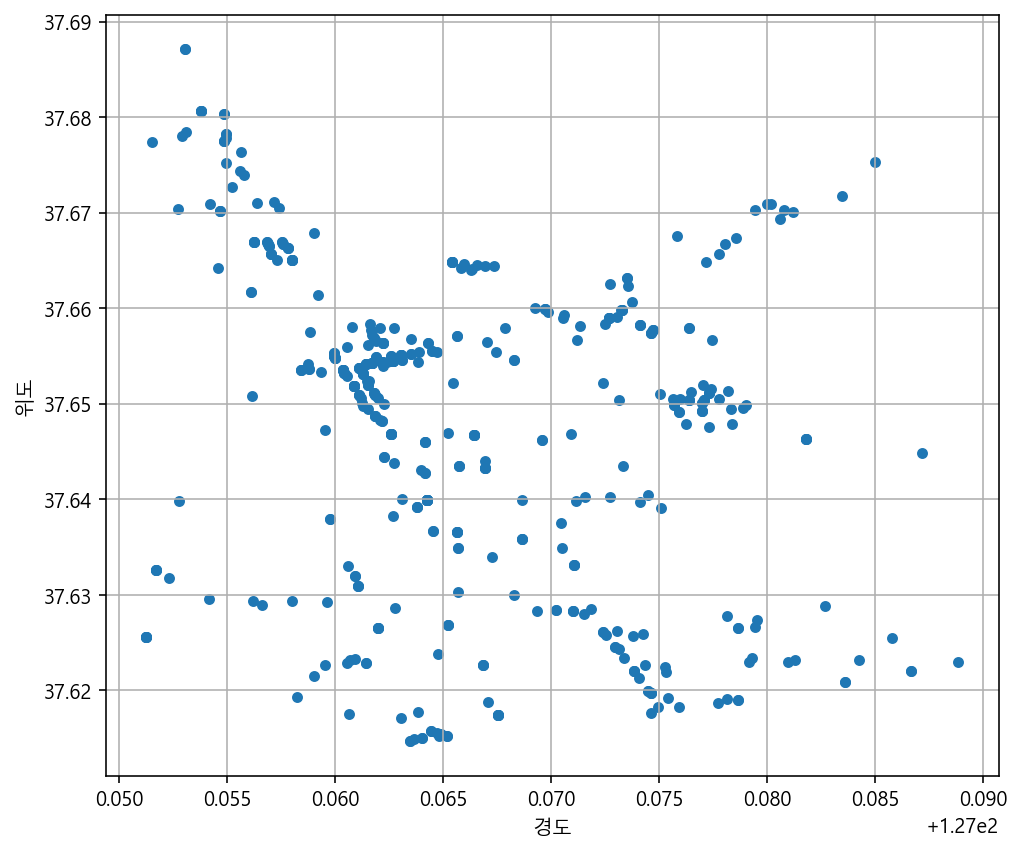

In [120]:
df_medical[["경도", "위도", "행정동명"]].plot.scatter(x="경도", y="위도", figsize=(8,7), grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

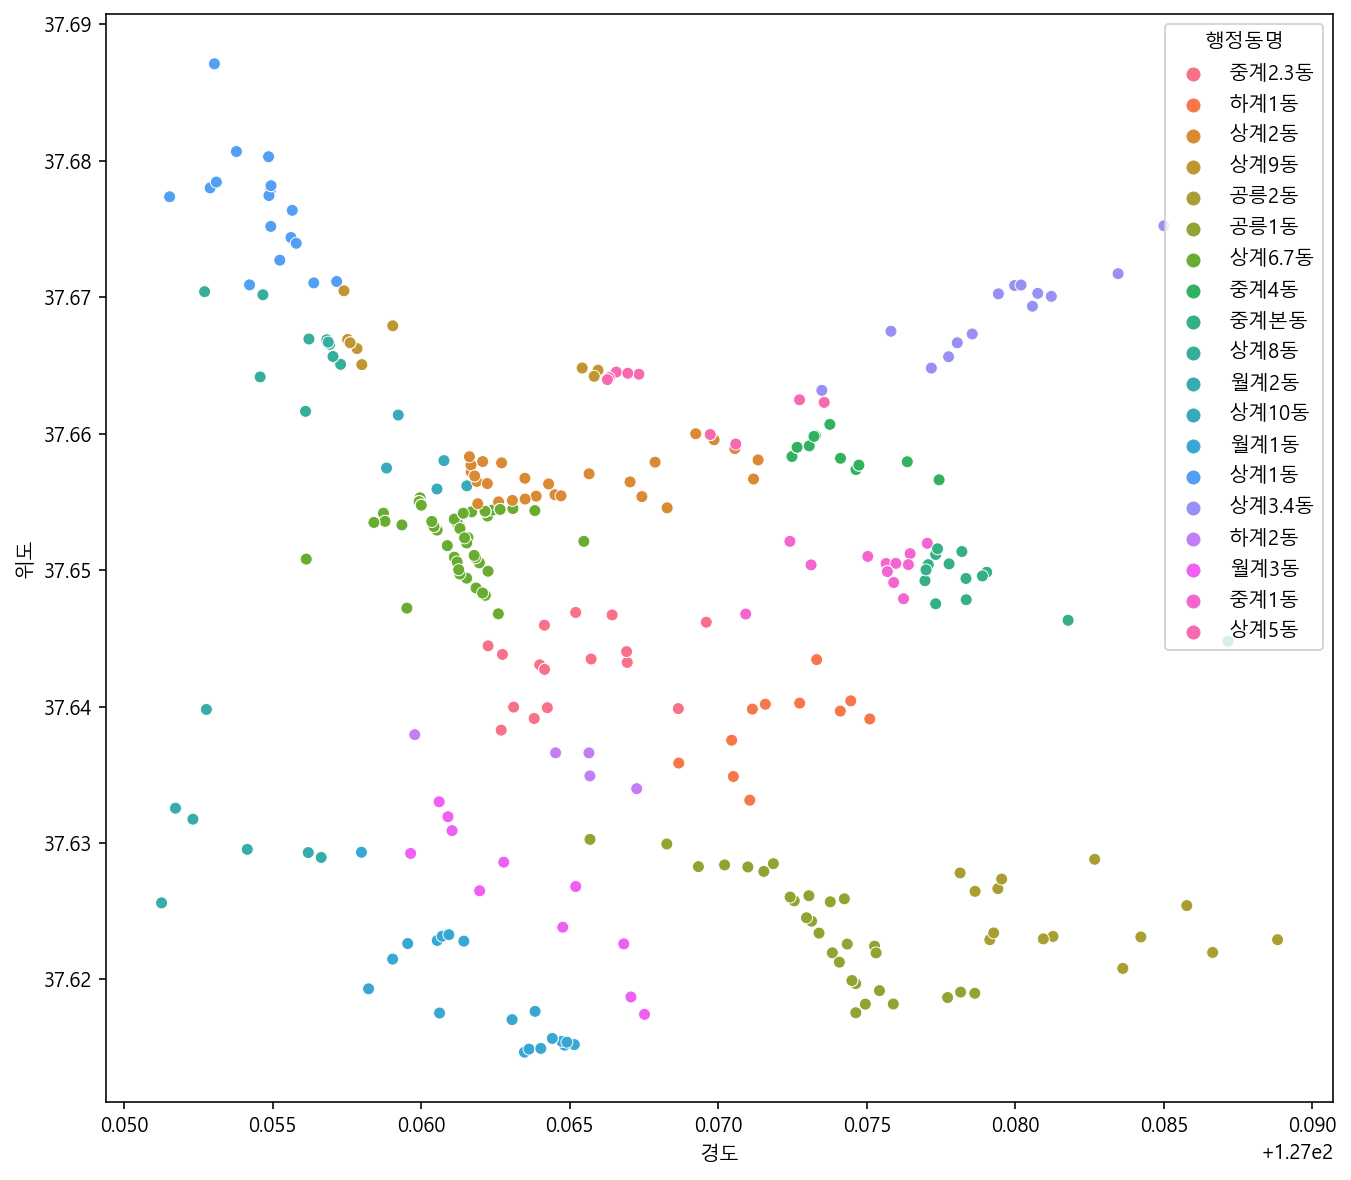

In [121]:
plt.figure(figsize=(11,10))
sns.scatterplot(data=df_medical, x="경도", y="위도", hue="행정동명")

In [122]:
import folium

In [141]:
left = df_medical["위도"].mean()
right = df_medical["경도"].mean()

In [149]:
# map = folium.Map(location=[df_medical["위도"].mean(), df_medical["경도"].mean()], zoom_start=12.5)


m = folium.Map(location=[df_medical["위도"].mean(), df_medical["경도"].mean()], zoom_start = 12.5)
loc = df_medical[["위도", "경도"]].values[:len(df_medical)].tolist()
m

In [151]:
# for n in df_medical.index:
# #     name = df_medical.loc[n, "상호명"]
# #     address = df_medical.loc[n, "도로명주소"]
# #     popup = f"{name}-{address}"
#     location = [df_medical.loc[n, "위도"], df_medical.loc[n, "경도"]]
#     folium.Circle(
#         radius=5,color='blue',fill = True,
#         location = location,
# #         popup = popup,
#     ).add_to(map)

m = folium.Map(location=[df_medical["위도"].mean(), df_medical["경도"].mean()], zoom_start = 12.5)
loc = df_medical[["위도", "경도"]].values[:len(df_medical)].tolist()

for i in range(len(df_medical)):
    folium.Circle(location=loc[i], radius=5, color="blue", fill = True).add_to(m)

m